## By Sbai Aymane
### Network Data Visualization 

First step would be to install the networkx python package that will help us read and mainuplate the network data

In [2]:
# pip install networkx

In [1]:
import networkx as nx
from scipy.io import mmread
import random
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
G = mmread('econ-poli-large.mtx')
NetD = nx.Graph(G)
print(NetD)

Graph with 15575 nodes and 33043 edges


In [3]:
list(NetD.edges)
#list(NetD.nodes)

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 97),
 (0, 98),
 (0, 123),
 (0, 124),
 (0, 126),
 (0, 129),
 (0, 132),
 (0, 134),
 (0, 135),
 (0, 137),
 (0, 138),
 (0, 139),
 (0, 647),
 (0, 652),
 (0, 678),
 (0, 679),
 (0, 687),
 (0, 1407),
 (0, 2131),
 (0, 2132),
 (0, 2284),
 (0, 2287),
 (0, 2305),
 (0, 5450),
 (0, 5579),
 (0, 5588),
 (0, 5660),
 (0, 6480),
 (0, 6508),
 (0, 6509),
 (0, 6512),
 (0, 6514),
 (0, 6515),
 (0, 6524),
 (0, 6525),
 (0, 6527),
 (0, 6530),
 (0, 6578),
 (0, 6580),
 (0, 6581),
 (0, 6600),
 (0, 6601),
 (0, 6602),
 (0, 7278),
 (0, 14845),
 (0, 14862),
 (0, 14863),
 (0, 14864),
 (0, 14865),
 (0, 14866),
 (0, 14867),
 (0, 14868),
 (0, 14871),
 (0, 14878),
 (0, 14879),
 (0, 14880),
 (0, 14883),
 (0, 14888),
 (0, 14889),
 (0, 14928),
 (0, 14949),
 (0, 14950),
 (0, 14953),
 (0, 14954),
 (0, 14957),
 (0, 14958),
 (0, 14959),
 (0, 14963),
 (0, 14966),
 (0, 14967),
 (0, 14968),
 (0, 14969),
 (0, 15098),
 (0, 15099),
 (0, 15104),
 (0, 15105),
 (0, 15106),
 (0, 15110),
 (0, 15111),
 (0, 1511

In [5]:
G = nx.petersen_graph()

In [12]:
num_nodes = len(G.nodes())
num_edges = len(G.edges())
sample_nodes = random.sample(list(G.nodes()), min(num_nodes, 20))
sample_edges = random.sample(list(G.edges()), min(num_edges, 30))

In [13]:
subgraph = G.edge_subgraph(sample_edges).subgraph(sample_nodes)

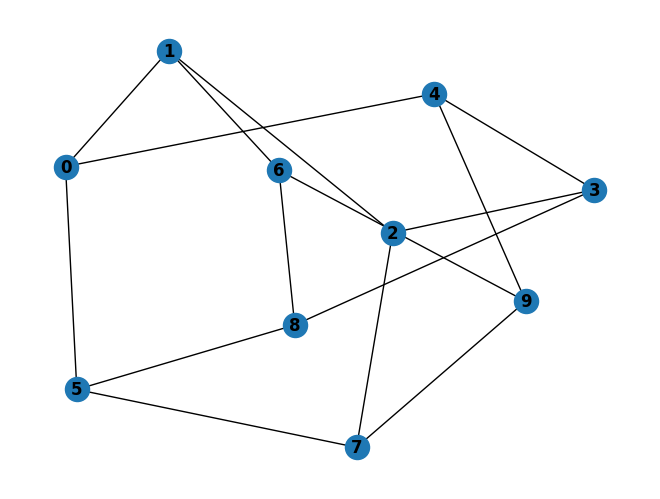

In [14]:
nx.draw(subgraph, with_labels=True, font_weight='bold')
plt.show()

# GeoPandas

In [18]:
gdf = gpd.read_file('national-parks-2-1.geo')

In [20]:
print(gdf.head())

   OBJECTID   GIS_ID              NAME ALPHA_CODE  PARK_CODE  \
0         1  Nps_060  Fort Circle Park       ROCR      832.0   
1         2  Nps_087  Fort Circle Park       ROCR      832.0   
2         3  Nps_081  Fort Circle Park       ROCR      832.0   
3         4  Nps_061  Fort Circle Park       ROCR      832.0   
4         5  Nps_543  Fort Circle Park       ROCR      832.0   

                                 LOCATION AQUIRED TRANS_DC SOURCE RESERVE  \
0  Fort Reno Park To Rock Creek Park , NW       6      NaT    NPS     515   
1    Fort Totten Park To Barnard Hill, NE    6, 8      NaT    NPS     451   
2    Fort Totten Park To Barnard Hill, NE    6, 8      NaT    NPS     451   
3    Fort Totten Park To Barnard Hill, NE    6, 8      NaT    NPS     451   
4    Fort Totten Park To Barnard Hill, NE    6, 8      NaT    NPS     451   

              LABEL  Shape_Length     Shape_Area         SQUARE SUFFIX   LOT  \
0  Fort Circle Park   3450.230475  114066.748273  MULTI-SQUARES   None  

In [21]:
print(gdf.dtypes)

OBJECTID                      int64
GIS_ID                       object
NAME                         object
ALPHA_CODE                   object
PARK_CODE                   float64
LOCATION                     object
AQUIRED                      object
TRANS_DC        datetime64[ns, UTC]
SOURCE                       object
RESERVE                      object
LABEL                        object
Shape_Length                float64
Shape_Area                  float64
SQUARE                       object
SUFFIX                       object
LOT                          object
SSL                          object
PAR                          object
geometry                   geometry
dtype: object


In [22]:
print(gdf.describe())

         OBJECTID   PARK_CODE  Shape_Length    Shape_Area
count  457.000000  427.000000    457.000000  4.570000e+02
mean   229.000000  830.531616    917.072874  6.244726e+04
std    132.068795  133.739466   3061.769499  3.630909e+05
min      1.000000    0.000000     10.394892  6.315863e+00
25%    115.000000  832.000000    100.725712  4.509060e+02
50%    229.000000  847.000000    205.664244  1.612303e+03
75%    343.000000  877.000000    665.148265  1.463035e+04
max    457.000000  893.000000  55996.036225  6.840972e+06


Another critical feature of it is that every column comes with its associated CRS information that tells us where the candidates are located on Earth. The reason why this feature is critical is that if you need to combine two spatial datasets you will need to make sure that they are expressed in the same CRS otherwise you will get the wrong results.

In [24]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
gdf.head()

,OBJECTID,GIS_ID,NAME,ALPHA_CODE,PARK_CODE,LOCATION,AQUIRED,TRANS_DC,SOURCE,RESERVE,LABEL,Shape_Length,Shape_Area,SQUARE,SUFFIX,LOT,SSL,PAR,geometry
0,1,Nps_060,Fort Circle Park,ROCR,832.0,"Fort Reno Park To Rock Creek Park , NW",6,NaT,NPS,515,Fort Circle Park,3450.230475,114066.748273,MULTI-SQUARES,None,0000,RES 05150000,None,"POLYGON ((-77.07239 38.95390, -77.07283 38.954..."
1,2,Nps_087,Fort Circle Park,ROCR,832.0,"Fort Totten Park To Barnard Hill, NE","6, 8",NaT,NPS,451,Fort Circle Park,856.712577,19801.020923,0000,None,0000,RES 04510000,None,"POLYGON ((-76.97227 38.94133, -76.97227 38.941..."
2,3,Nps_081,Fort Circle Park,ROCR,832.0,"Fort Totten Park To Barnard Hill, NE","6, 8",NaT,NPS,451,Fort Circle Park,952.759982,6071.469563,0000,None,0000,RES 04510000,None,"POLYGON ((-76.97399 38.94327, -76.97395 38.943..."
3,4,Nps_061,Fort Circle Park,ROCR,832.0,"Fort Totten Park To Barnard Hill, NE","6, 8",NaT,NPS,451,Fort Circle Park,1154.493074,39763.587883,0000,None,0000,RES 04510000,None,"POLYGON ((-76.99700 38.95256, -76.99727 38.952..."
4,5,Nps_543,Fort Circle Park,ROCR,832.0,"Fort Totten Park To Barnard Hill, NE","6, 8",NaT,NPS,451,Fort Circle Park,2600.063143,73493.171163,0000,None,0000,RES 04510000,None,"MULTIPOLYGON (((-76.97795 38.94654, -76.97858 ..."


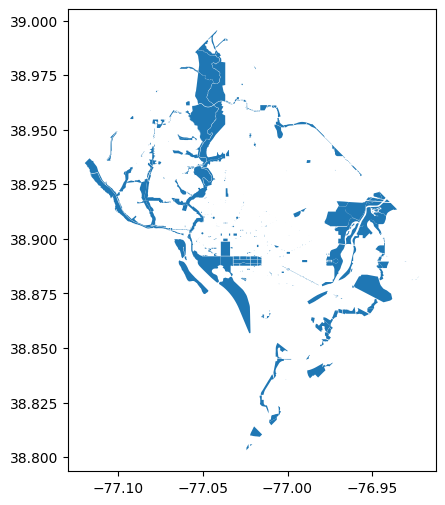

In [29]:
ax= gdf.plot(figsize=(10,6))

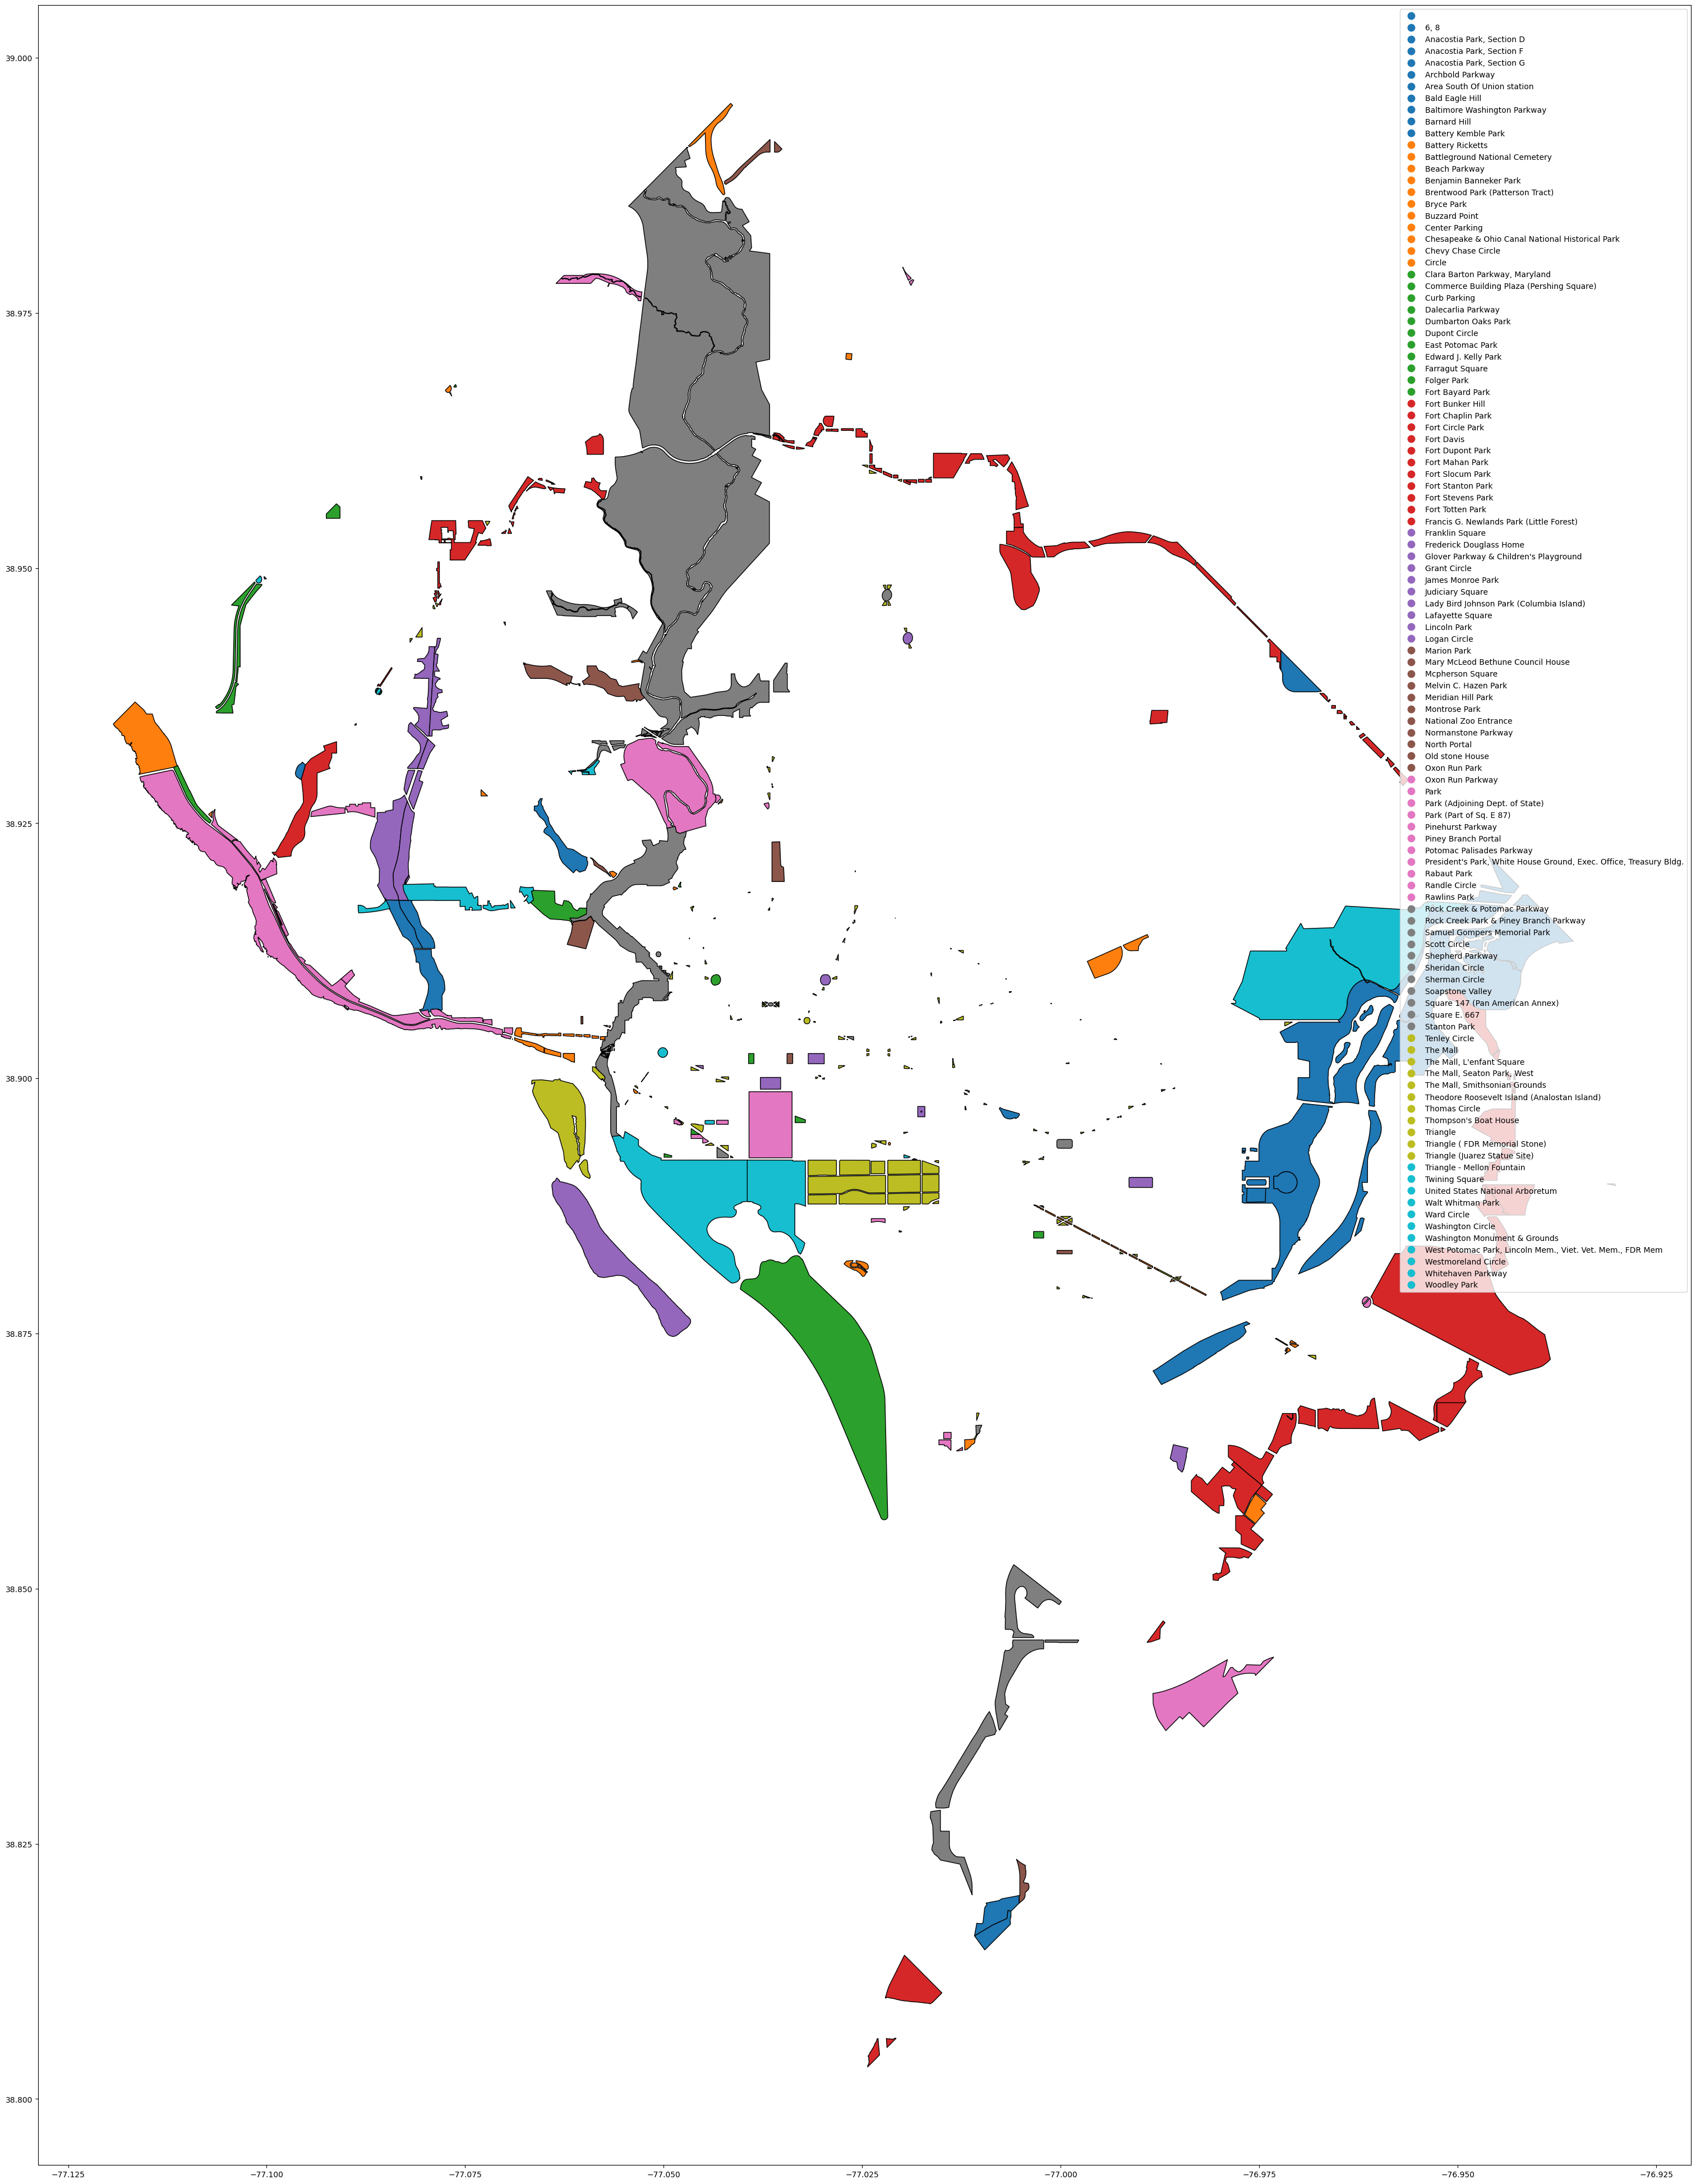

In [37]:
ax= gdf.plot(column='NAME', figsize=(80,50), edgecolor='black', legend=True)